<a href="https://colab.research.google.com/github/SabrinaDantas/projeto_programacao_para_dados_pucrs/blob/main/projeto_programacaoparadados_fase02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programação para Dados - Análise de Dados da Steam para Fun Corp.

##Bibliotecas

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

## Leitura do Arquivo

In [5]:
df_steam = pd.read_csv('steam_games.csv') # Leitura do arquivo

In [6]:
df_steam.head() # Verificar as 5 primeiras linhas

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [7]:
df_steam.info() # Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72934 entries, 0 to 72933
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       72934 non-null  int64  
 1   Name                        72932 non-null  object 
 2   Release date                72934 non-null  object 
 3   Estimated owners            72934 non-null  object 
 4   Peak CCU                    72934 non-null  int64  
 5   Required age                72934 non-null  int64  
 6   Price                       72934 non-null  float64
 7   DLC count                   72934 non-null  int64  
 8   About the game              70402 non-null  object 
 9   Supported languages         72934 non-null  object 
 10  Full audio languages        72934 non-null  object 
 11  Reviews                     9217 non-null   object 
 12  Header image                72934 non-null  object 
 13  Website                     354

## Perguntas

### 1. Quais são os dez jogos mais bem avaliados, de acordo com o Metacritic? No caso de notas repetidas, ordenar os jogos de acordo com suas datas de lançamento (do mais velho para o mais recente).  

Para responder à pergunta, é necessário primeiro transformar a coluna de data em formato datetime para análise. Em seguida, ordena-se o DataFrame, primeiramente pelo valor da coluna "Metacritic score" em ordem decrescente e, posteriormente, pelos valores da coluna "Release date" em ordem crescente.

In [8]:
# Transforma a coluna data em datetime
df_steam['Release date'] = pd.to_datetime(df_steam['Release date'])

In [9]:
df_steam.head(5) # Verificar as 5 primeiras linhas do df

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [10]:
# Metacritic score em ordem decrescente e depois 'Release date' em ordem crescente
top_10 = df_steam.sort_values(by=['Metacritic score', 'Release date'], ascending=[False, True])

In [11]:
# Seleciona a coluna necessária e filtra as 10 primeiras linhas
top_10[['AppID', 'Name', 'Release date', 'Metacritic score']].head(10)

,AppID,Name,Release date,Metacritic score
45752,632470,Disco Elysium - The Final Cut,2019-10-15,97
64935,1687950,Persona 5 Royal,2022-10-20,97
49557,70,Half-Life,1998-11-08,96
36775,220,Half-Life 2,2004-11-16,96
32406,7670,BioShock™,2007-08-21,96
57205,271590,Grand Theft Auto V,2015-04-13,96
28170,620,Portal 2,2011-04-18,95
28484,659,Portal 2,2011-04-18,95
12746,3900,Sid Meier's Civilization® IV,2006-10-25,94
55150,34440,Sid Meier's Civilization® IV,2006-10-25,94


### 2. Para jogos de role-playing, qual o número médio e máximo de: DLCs, avaliações positivas, avaliações negativas e materiais de demonstração (número de capturas de tela e filmes, somados)?

Para a análise dos materiais de demonstração, será criada uma função para contar o número de itens em duas colunas de um DataFrame, Screenshots e Movies. Essa função retorna 0 se ambas estiverem vazias, 1 se apenas uma delas estiver vazia e 2 se ambas tiverem valores. Em seguida, será criada uma nova coluna onde serão calculados os valores usando essa função, aplicada a cada linha do DataFrame.

In [12]:
# função para contar o número de itens em duas colunas
def contar_itens(row):
  if pd.isna(row['Screenshots']) and pd.isna(row['Movies']):
    return 0
  elif pd.isna(row['Screenshots']) or pd.isna(row['Movies']):
    return 1
  else:
    return 2

In [13]:
# Cria a coluna Demo materials onde retorna os valores usando a função contar_itens
df_steam['Demo materials'] = df_steam.apply(contar_itens, axis=1)

In [14]:
df_steam[['Screenshots', 'Movies', 'Demo materials']].sample(25)

,Screenshots,Movies,Demo materials
27357,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2
45834,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2
35804,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2
49645,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2
65358,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2
48014,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2
4756,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2
41626,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2
26772,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2
5947,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2


Para filtrar o gênero RPG, você pode usar a função "contains" para fazer uma busca de texto em uma coluna específica. Isso significa que você pode procurar por todas as linhas em que o texto da coluna corresponda ao gênero RPG.

In [15]:
# Criação de um DataFrame que contém apenas o gênero RPG
jogos_rpg = df_steam[df_steam['Genres'].str.contains('RPG', na=False)]
jogos_rpg['Genres'].sample(15)

60257                        Indie,RPG,Simulation,Strategy
1805                                   Adventure,Indie,RPG
27662           Action,Adventure,Casual,Indie,RPG,Strategy
46212    Action,Adventure,Indie,Massively Multiplayer,R...
7011                                             Indie,RPG
33598                                  Adventure,Indie,RPG
13636              Action,Adventure,Indie,RPG,Early Access
45207            Adventure,Indie,RPG,Strategy,Early Access
57383           Action,Adventure,Casual,Indie,RPG,Strategy
45435                                  Adventure,Indie,RPG
29476                                                  RPG
17074                Action,Adventure,Indie,RPG,Simulation
31118                    Violent,Gore,Adventure,Casual,RPG
33384              Action,Adventure,Indie,RPG,Early Access
60474                                 Action,Adventure,RPG
Name: Genres, dtype: object

Após esse tratamento de dados, pode-se obter o número médio e máximo de DLCs, avaliações positivas, avaliações negativas e materiais de demonstração.

In [16]:
# Número médio e máximo de DLCs
media_dlcs = jogos_rpg['DLC count'].mean()
maximo_dlcs = jogos_rpg['DLC count'].max()

print(f"Número médio de DLCs do gênero RPG: {media_dlcs:.2f}")
print(f"Número máximo de DLCs do gênero RPG: {maximo_dlcs}")
print('\n')

# Número médio e máximo de avaliações positivas
media_positivas = jogos_rpg['Positive'].mean()
maximo_positivas = jogos_rpg['Positive'].max()

print(f"Número médio de avaliações positivas do gênero RPG: {media_positivas:.2f}")
print(f"Número máximo de avaliações positivas do gênero RPG: {maximo_positivas}")
print('\n')

# Número médio e máximo de avaliações negativas
media_negativas = jogos_rpg['Negative'].mean()
maximo_negativas = jogos_rpg['Negative'].max()

print(f"Número médio de avaliações negativas do gênero RPG: {media_negativas:.2f}")
print(f"Número máximo de avaliações negativas do gênero RPG: {maximo_negativas}")
print('\n')

# Número médio e máximo de materiais de demonstração
media_demo = jogos_rpg['Demo materials'].mean()
maximo_demo = jogos_rpg['Demo materials'].max()

print(f"Número médio de materiais de demonstração do gênero RPG: {media_demo:.2f}")
print(f"Número máximo de materiais de demonstração do gênero RPG: {maximo_demo}")

Número médio de DLCs do gênero RPG: 0.95
Número máximo de DLCs do gênero RPG: 2366


Número médio de avaliações positivas do gênero RPG: 1516.41
Número máximo de avaliações positivas do gênero RPG: 964983


Número médio de avaliações negativas do gênero RPG: 247.17
Número máximo de avaliações negativas do gênero RPG: 129925


Número médio de materiais de demonstração do gênero RPG: 1.95
Número máximo de materiais de demonstração do gênero RPG: 2


### 3. Quais são as cinco empresas que mais publicam jogos pagos na plataforma? Para tais empresas, qual o número médio e mediano de avaliações positivas de seus jogos pagos?  

In [17]:
# DataFrame apenas com os jogos Pagos
jogos_pagos = df_steam[df_steam['Price'] > 0]

In [18]:
# Agrupar por 'Publishers' e calcular o número total de avaliações positivas
avaliacoes_por_editor = jogos_pagos.groupby('Publishers')['Positive'].sum()

In [41]:
#Cinco empresas com mais jogos pagos
cinco_maiores_editores = avaliacoes_por_editor.nlargest(5)
print(cinco_maiores_editores)

Publishers
Ubisoft               3388203
Valve                 2879816
Bethesda Softworks    1879214
Electronic Arts       1278464
Xbox Game Studios     1274189
Name: Positive, dtype: int64


In [20]:
# Número médio e mediano de avaliações positivas para essas empresas
cinco_empresas = ["Ubisoft", "Valve", "Bethesda Softworks", "Electronic Arts", "Xbox Game Studios"]

# Loop sobre cada empresa
for empresa in cinco_empresas:
    # Filtrar o DataFrame original para incluir apenas jogos da empresa atual
    jogos_empresa = jogos_pagos[jogos_pagos['Publishers'] == empresa]

    # Calcular média e mediana de avaliações positivas para a empresa atual
    media_avaliacoes = jogos_empresa['Positive'].mean()
    mediana_avaliacoes = jogos_empresa['Positive'].median()

    # Imprimir estatísticas para a empresa atual
    print(f"Estatísticas para {empresa}:")
    print(f"Número médio de avaliações positivas: {media_avaliacoes:.2f}")
    print(f"Número mediano de avaliações positivas: {mediana_avaliacoes:.0f}")
    print()

Estatísticas para Ubisoft:
Número médio de avaliações positivas: 26678.76
Número mediano de avaliações positivas: 1712

Estatísticas para Valve:
Número médio de avaliações positivas: 110762.15
Número mediano de avaliações positivas: 24758

Estatísticas para Bethesda Softworks:
Número médio de avaliações positivas: 37584.28
Número mediano de avaliações positivas: 11147

Estatísticas para Electronic Arts:
Número médio de avaliações positivas: 14694.99
Número mediano de avaliações positivas: 4795

Estatísticas para Xbox Game Studios:
Número médio de avaliações positivas: 27110.40
Número mediano de avaliações positivas: 7872



### 4. O número de jogos que suportam o sistema operacional Linux cresceu entre 2018 e 2022?  

In [21]:
# Jogos que suportam Linux
jogos_linux = df_steam[df_steam['Linux'] == True].copy()

In [44]:
# Nova coluna com apenas os anos
jogos_linux['Year'] = jogos_linux['Release date'].dt.year
jogos_linux.head(3)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,Demo materials,Year
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2,2020
9,320150,Deadlings: Rotten Edition,2014-11-11,50000 - 100000,0,0,3.99,0,Death is lonely. He has zero friends on his Fa...,"['English', 'Polish', 'French', 'Italian', 'Ge...",...,0,ONE MORE LEVEL,ONE MORE LEVEL,"Single-player,Steam Achievements,Steam Trading...","Action,Adventure,Indie","Action,Indie,Adventure,Puzzle-Platformer,Arcad...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2,2014
13,825930,Royal Battleships,2018-04-06,20000 - 50000,0,0,2.99,0,Sometimes there is nothing better than a tourn...,['English'],...,0,Educational Games,Educational Games,"Single-player,Steam Achievements,Steam Leaderb...","Casual,Indie","Indie,Casual",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2,2018


In [23]:
# Filtrar os jogos lançados entre 2018 e 2022
jogos_2018_2022_linux = jogos_linux[jogos_linux['Year'].between(2018, 2022)]

In [24]:
# Contar o número de jogos lançados em cada ano entre 2018 e 2022
num_jogos_por_ano = jogos_2018_2022_linux['Year'].value_counts()
num_jogos_por_ano

2022    1311
2021    1211
2018    1190
2020    1084
2019     924
Name: Year, dtype: int64

In [25]:
# ano e o número de jogos lançados em ordem descrente dos anos
lista_num_jogos_ano = [(ano, num_jogos_por_ano[ano]) for ano in sorted(num_jogos_por_ano.index)]
lista_num_jogos_ano

[(2018, 1190), (2019, 924), (2020, 1084), (2021, 1211), (2022, 1311)]

### 5. Quais são os três jogos com as maiores recomendações que oferecem suporte ao idioma Português - BR e tem classificação etária superior ou igual a 16 anos?

In [26]:
# Criação de um DataFrame que contém apenas o idioma PT-BR
jogos_pt_br = df_steam[df_steam['Supported languages'].str.contains('Portuguese - Brazil', na=False)]
jogos_pt_br.sample(2)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,Demo materials
33647,1253920,Rogue Legacy 2,2022-04-28,200000 - 500000,1688,0,24.99,0,Rogue Legacy is back! But now it's got a 2 on ...,"['English', 'French', 'Italian', 'German', 'Sp...",...,869,22,Cellar Door Games,Cellar Door Games,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Indie,RPG","Rogue-lite,Metroidvania,Action,Indie,Platforme...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2
59943,289690,LARA CROFT AND THE TEMPLE OF OSIRIS™,2014-12-08,200000 - 500000,16,13,19.99,4,Lara Croft and the Temple of Osiris is the seq...,"['English', 'French', 'Italian', 'German', 'Sp...",...,65,0,Crystal Dynamics,Square Enix,"Single-player,Multi-player,Co-op,Shared/Split ...","Action,Adventure","Adventure,Action,Co-op,Local Co-Op,Multiplayer...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2


In [27]:
# Criação do dataframe com a classe etária >= 16 anos
jogos_pt_br_16 = jogos_pt_br[jogos_pt_br['Required age'] >= 16]

In [28]:
# Ordena a coluna Recommendations em ordem decrescente
jogos_pt_br_16 = jogos_pt_br_16.sort_values(by='Recommendations', ascending=False)

# Filtra as 3 primeiras linhas
jogos_pt_br_16[['Name', 'Required age', 'Supported languages', 'Recommendations']].head(3)

,Name,Required age,Supported languages,Recommendations
57205,Grand Theft Auto V,17,"['English', 'French', 'Italian', 'German', 'Sp...",1247051
38967,Tom Clancy's Rainbow Six® Siege,17,"['English', 'French', 'Italian', 'German', 'Sp...",899838
21190,Tom Clancy's Rainbow Six® Siege,17,"['English', 'French', 'Italian', 'German', 'Sp...",899613


# Gráficos

### Design dos gráficos

In [29]:
custom_style = {
    'figure.figsize': (10, 6),
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'lines.linewidth': 2,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
    'legend.fontsize': 12,
    'legend.loc': 'best',
    'font.family': 'DejaVu Sans',
    'font.weight': 'normal',
    'axes.edgecolor': '#555555',
    'axes.facecolor': '#FFFFFF',
    'axes.spines.top': True,
    'axes.spines.right': True,
}

mpl.rcParams.update(custom_style)

### 1. Percentual de jogos que possuem suporte para cada sistema operacional. Caso um jogo suporte múltiplos sistemas operacionais, contar um “voto” para cada sistema operacional suportado.  

In [45]:
# Total de jogos no DataFrame
total_jogos = len(df_steam)

In [46]:
# Inicialização das contagens para cada sistema operacional
windows = 0
mac = 0
linux = 0

# Iteração sobre as linhas do DataFrame para contar o número de jogos para cada sistema operacional
for index, row in df_steam.iterrows():
    if row['Windows'] == True:
        windows += 1
    if row['Mac'] == True:
        mac += 1
    if row['Linux'] == True:
        linux += 1

In [47]:
# Cálculo dos percentuais de jogos para cada sistema operacional
percentual_windows = (windows / total_jogos) * 100
percentual_mac = (mac / total_jogos) * 100
percentual_linux = (linux / total_jogos) * 100

# Lista de sistemas operacionais e seus respectivos percentuais
sistemas_operacionais = ['Windows', 'Mac', 'Linux']
percentuais = [percentual_windows, percentual_mac, percentual_linux]

(0.0, 100.0)

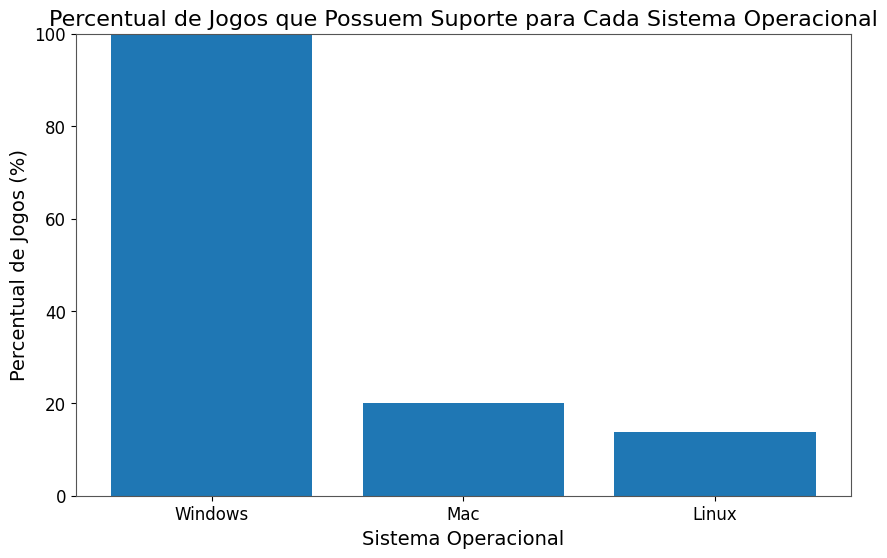

In [48]:
# Plotagem do gráfico de barras
plt.bar(sistemas_operacionais, percentuais)
plt.xlabel('Sistema Operacional')
plt.ylabel('Percentual de Jogos (%)')
plt.title('Percentual de Jogos que Possuem Suporte para Cada Sistema Operacional')
plt.ylim(0, 100)


### 2.Número total de jogos single-player do gênero Indie e estratégia lançados por ano entre 2010 e 2020 (mostrar tendência para cada gênero separadamente, mas no mesmo gráfico).  

In [49]:
# Filtrar os jogos single-player
single_player = df_steam[df_steam['Peak CCU'] == 1].copy()

In [50]:
# Extrair o ano de lançamento dos jogos
single_player['Year'] = single_player['Release date'].dt.year
single_player.head(1)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,Demo materials,Year
8,1178150,MazM: Jekyll and Hyde,2020-04-02,0 - 20000,1,0,14.99,0,'MazM: Jekyll and Hyde' is a darkly entertaini...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,Growing Seeds,"CFK Co., Ltd.","Single-player,Steam Achievements,Full controll...","Adventure,RPG,Simulation,Strategy","Adventure,Simulation,RPG,Strategy,Singleplayer...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2,2020


In [51]:
# Filtrar os jogos single-player lançados entre 2010 e 2020
single_player_2010_2020 = single_player[single_player['Year'].between(2010, 2020)]

In [52]:
# Filtrar jogos indie e de estratégia lançados entre 2010 e 2020
jogos_indie = single_player_2010_2020[single_player_2010_2020['Genres'].str.contains('Indie', na=False)]
jogos_estrategia = single_player_2010_2020[single_player_2010_2020['Genres'].str.contains('Strategy', na=False)]

In [53]:
# Agrupar os dados por ano e gênero e contar o número de jogos em cada grupo
indie_por_ano = jogos_indie.groupby('Year').size()
estrategia_por_ano = jogos_estrategia.groupby('Year').size()

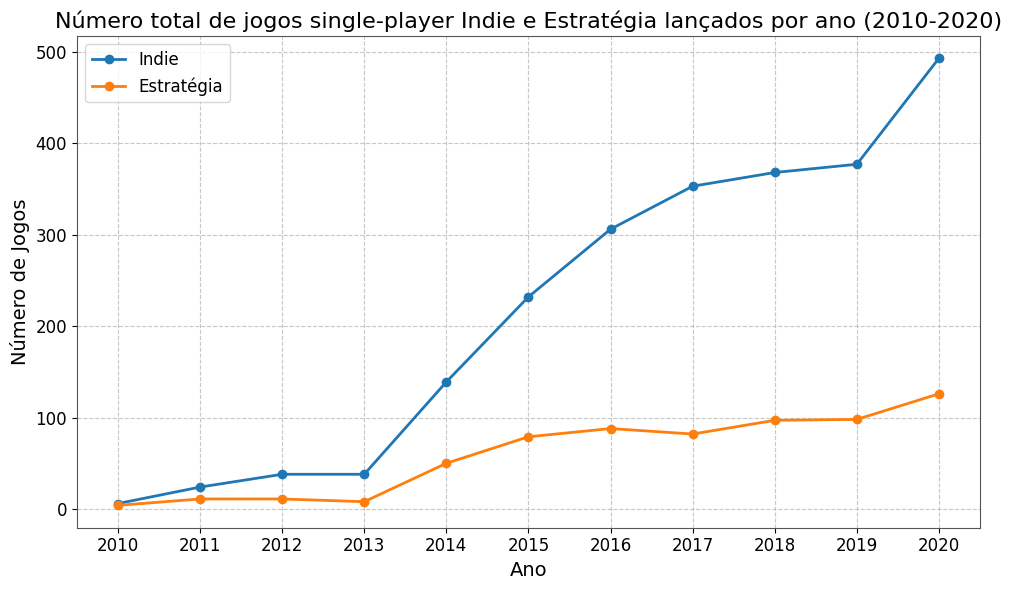

In [54]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(indie_por_ano.index, indie_por_ano.values, marker='o', label='Indie')
plt.plot(estrategia_por_ano.index, estrategia_por_ano.values, marker='o', label='Estratégia')

# Adicionar rótulos e título
plt.title('Número total de jogos single-player Indie e Estratégia lançados por ano (2010-2020)')
plt.xlabel('Ano')
plt.ylabel('Número de Jogos')
plt.xticks(range(2010, 2021))  # Definir os ticks no eixo x para cada ano
plt.legend()  # Adicionar legenda
plt.grid(True)  # Adicionar grade ao gráfico
plt.tight_layout()  # Ajustar layout

### 3. Tempo médio total de jogos lançados entre os anos de 2014 até 2019.

In [55]:
# Extrair o ano de lançamento dos jogos
df_steam['Year'] = df_steam['Release date'].dt.year

In [56]:
# Filtrar os jogos lançados entre 2014 e 2019
anos_2014_2019 = df_steam[df_steam['Year'].between(2014, 2019)]

In [59]:
# Agrupar os dados por ano e calcular o tempo médio total para cada ano
tempo_medio_por_ano = anos_2014_2019.groupby('Year')['Average playtime forever'].sum()
tempo_medio_por_ano

Year
2014     595974
2015     846169
2016    1023856
2017     990931
2018     955727
2019     982164
Name: Average playtime forever, dtype: int64

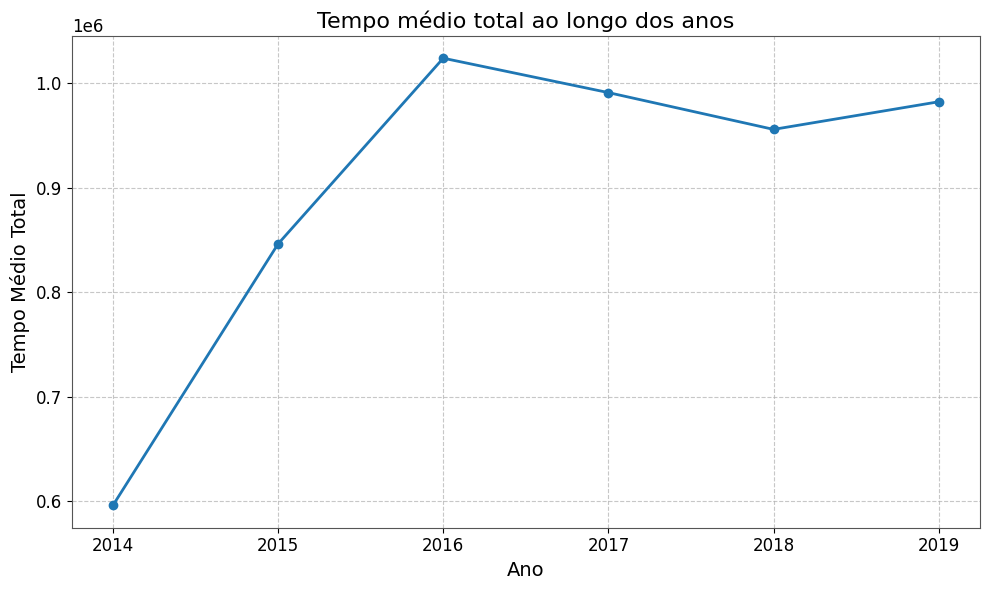

In [58]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(tempo_medio_por_ano.index, tempo_medio_por_ano.values, marker='o')

# Adicionar rótulos e título
plt.title('Tempo médio total ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Tempo Médio Total')
plt.xticks(tempo_medio_por_ano.index)  # Definir os ticks no eixo x para cada ano
plt.grid(True)  # Adicionar grade ao gráfico
plt.tight_layout()  # Ajustar layout
